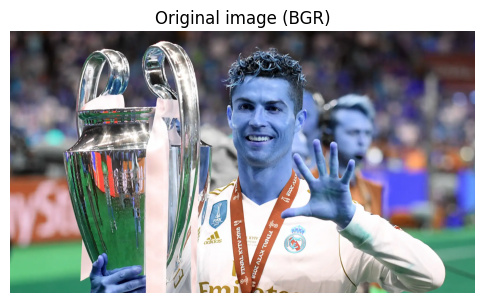

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
image_path = os.path.join("../images", "ronaldo.jpeg")
image = cv2.imread(image_path)

# function to display the image
def show_image(title,img,cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img,cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

show_image("Original image (BGR)",image)

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to CMYK
# Normalize RGB to range 0-1
image_cmyk = 1 - image_rgb.astype(float) / 255.0  # CMY = 1 - RGB (normalized)

K = np.min(image_cmyk, axis=2)  # Calculate the Black (K) channel
C = (image_cmyk[:, :, 0] - K) / (1 - K + 1e-6)  # Avoid division by zero
M = (image_cmyk[:, :, 1] - K) / (1 - K + 1e-6)
Y = (image_cmyk[:, :, 2] - K) / (1 - K + 1e-6)

# Stack channels into a CMYK array
CMYK = np.dstack((C, M, Y, K))

In [7]:
def show_channel(title, channel, cmap="gray"):
    plt.figure(figsize=(6, 6))
    plt.imshow(channel, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

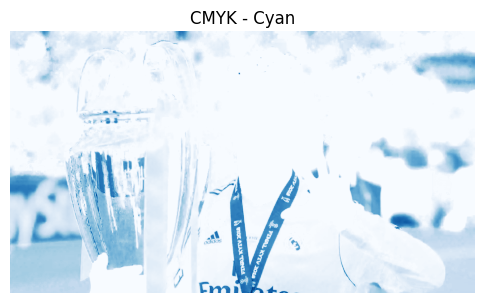

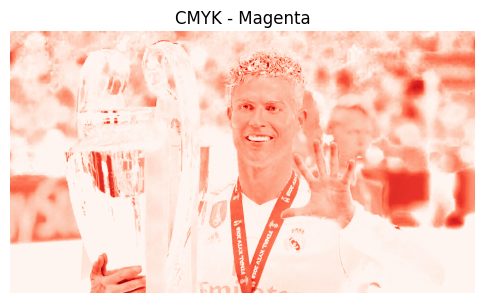

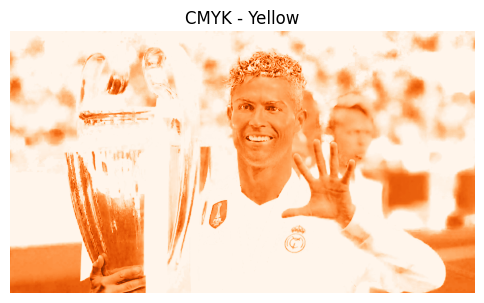

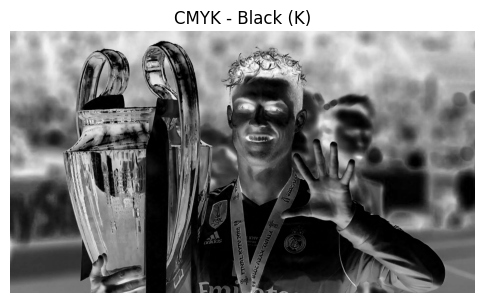

In [8]:
# Display each CMYK channel
show_channel("CMYK - Cyan", C, cmap="Blues")
show_channel("CMYK - Magenta", M, cmap="Reds")
show_channel("CMYK - Yellow", Y, cmap="Oranges")
show_channel("CMYK - Black (K)", K, cmap="gray")